## *Modelling ancient areas for date palms (Phoenix species, Arecaceae): Bayesian analysis of biological and cultural evidence*

Bayesian Inference from conditionally independent binary features.

In [1]:
%matplotlib inline

# local en ventana independiente:
# %matplotlib tk

import pandas as pd
import numpy as np
from collections import Counter

We first read the input data:

In [2]:
df = pd.read_csv('http://robot.inf.um.es/material/data/evidence_data.csv',sep=';')

In [3]:
list(df.columns)

['Mints and references',
 'Present day locality',
 'Palm-tree evidence period barycenter',
 'Palm-tree evidence period',
 'Palm groves',
 'Coinages',
 'Date remains',
 'Inflorescence',
 'Leaves',
 'Stems and charcoal',
 'Pollen',
 'Phytoliths',
 'Texts',
 'Pottery',
 'Wood paintings, papyri and scrolls',
 'Jewelry, gold cups and seals',
 'Rock and Wall painting and mosaic',
 'Sculpture (stone, bronze and wood)',
 'References',
 'Taxa',
 'Latitude',
 'Long Deg',
 'Long Min',
 'Long Seg',
 'Longitude',
 'Altitude',
 'a10']

Define short names for the different type of evidences.

In [4]:
evi_name = list(df.columns)[4:18]
evi_short = "palmGrov coin datRe inflor leave stemCh pollen phytol texts potter paint jewel rockP sculpt".split()
list(zip(evi_short, evi_name))

[('palmGrov', 'Palm groves'),
 ('coin', 'Coinages'),
 ('datRe', 'Date remains'),
 ('inflor', 'Inflorescence'),
 ('leave', 'Leaves'),
 ('stemCh', 'Stems and charcoal'),
 ('pollen', 'Pollen'),
 ('phytol', 'Phytoliths'),
 ('texts', 'Texts'),
 ('potter', 'Pottery'),
 ('paint', 'Wood paintings, papyri and scrolls'),
 ('jewel', 'Jewelry, gold cups and seals'),
 ('rockP', 'Rock and Wall painting and mosaic'),
 ('sculpt', 'Sculpture (stone, bronze and wood)')]

Show the first record:

In [5]:
df.loc[0]

Mints and references                    Acre, Haifa Bay, North, Israel
Present day locality                       Ace Ptolemais (Galilaea) 8,
Palm-tree evidence period barycenter                             47 BC
Palm-tree evidence period                                          -47
Palm groves                                                          0
Coinages                                                             1
Date remains                                                         0
Inflorescence                                                        0
Leaves                                                               0
Stems and charcoal                                                   0
Pollen                                                               0
Phytoliths                                                           0
Texts                                                                0
Pottery                                                              0
Wood p

Palm types:

In [6]:
print(set(df['Taxa']))
phoenix = np.where(np.array(df['Taxa'])=='Phoenix')
phoenix

{'P iberica', 'P atlantica', 'P theophrasti', 'P arabica', 'P dactylifera', 'P bohemica', 'P canariensis', 'P caespitosa', 'Phoenix', 'P reclinata'}


(array([1521, 1569, 1605, 1606, 1717, 1754, 1826, 1827, 1849, 1851, 1852,
        1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
        1883, 1884, 1895]),)

In [7]:
palm_type = set(df.Taxa[df["Palm groves"]==1])
palm_type

{'P arabica',
 'P atlantica',
 'P caespitosa',
 'P canariensis',
 'P dactylifera',
 'P iberica',
 'P reclinata',
 'P theophrasti'}

Features of interest in this study:

In [8]:
target = 4
set1 = [5,6]
set2 = [12,13]

sets = [[target], set1,set2]
colors = ['green','red','blue']
setnames = ['palms today', 'cultural', 'type 2']

features = [evi_short[k-4] for k in sum(sets,[])]

In [9]:
#bindf = df[df.columns[4:18]]

bindf = df[df.columns[sum(sets,[])]]
bindf[:10]

,Palm groves,Coinages,Date remains,Texts,Pottery
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,1,0,0,0
9,0,1,0,0,0


Extraction of features as a numpy array:

In [10]:
bindataraw = np.array(bindf)
bindataraw

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

Check that all records have a single type of evidence.

In [11]:
Counter(bindataraw.sum(axis=1))

Counter({1: 2444, 0: 389})

Get geographic location of each item.

In [12]:
locationraw = df[["Longitude","Latitude"]].apply(np.vectorize(lambda x: float(x.replace(',','.'))))
locationraw[:10]

,Longitude,Latitude
0,35.081667,32.927778
1,29.916667,31.200000
2,29.916667,31.200000
3,35.837222,40.656389
4,20.841389,38.922222
5,20.841389,38.922222
6,36.150000,36.200000
7,36.150000,36.200000
8,36.150000,36.200000
9,36.150000,36.200000


Extract times of evidences:

In [13]:
evtime = np.array(df['Palm-tree evidence period'])
np.where(evtime=='500 BC') # fix dataset
evtime[613] = '-500'
evtime[evtime=='?'] = '0'  # year zero = unknown
evtime = evtime.astype(int)

Check the dates that appear in the dataset (without repetitions):

In [14]:
print(sorted(list(set(evtime))))

[-76000000, -50000000, -40000000, -35000000, -20000000, -18000000, -14000000, -5000000, -3900000, -1785000, -48000, -45000, -44000, -35000, -14000, -11500, -10000, -7050, -6000, -5530, -5500, -5400, -5050, -5000, -4600, -4500, -4400, -4050, -4000, -3800, -3700, -3600, -3500, -3450, -3400, -3300, -3200, -3100, -3000, -2950, -2800, -2700, -2600, -2509, -2500, -2400, -2350, -2334, -2300, -2250, -2200, -2149, -2112, -2100, -2050, -2000, -1980, -1925, -1900, -1870, -1850, -1840, -1830, -1800, -1790, -1770, -1750, -1700, -1650, -1630, -1580, -1575, -1550, -1500, -1475, -1468, -1450, -1427, -1420, -1410, -1400, -1390, -1380, -1354, -1350, -1340, -1330, -1310, -1300, -1290, -1279, -1250, -1200, -1175, -1150, -1100, -1050, -1000, -900, -875, -870, -867, -850, -840, -800, -735, -730, -725, -710, -700, -667, -660, -653, -650, -640, -625, -620, -618, -617, -600, -585, -580, -578, -569, -555, -551, -545, -540, -539, -530, -528, -519, -517, -508, -505, -500, -490, -487, -485, -480, -470, -450, -440,

Select records with any of the desired evidences in the selected time interval.

In [15]:
tmin = 1
tmax = 2020

selected_records = (evtime != 0) & (evtime >= tmin) & (evtime <= tmax) & bindataraw.sum(axis=1) == 1
bindata = bindataraw[selected_records]
location = locationraw[selected_records]

print(f'{selected_records.sum()} evidences selected')

2012 evidences selected


In [16]:
classes = [ np.array(df[df.columns[s]]).sum(axis=1)[selected_records] == True for s in sets]

Preparation of map drawing functions.

In [17]:
import cartopy
import cartopy.feature as cpf
import matplotlib.pyplot as plt

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

lat_lon = cartopy.crs.PlateCarree()

In [18]:
def genmap(extent, figsize, grid=2):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection=cartopy.crs.Mercator())
    lon1,lon2,lat1,lat2 = extent
    
    ax.add_feature(cpf.LAND)
    ax.add_feature(cpf.OCEAN)
    ax.add_feature(cpf.COASTLINE)
    ax.add_feature(cpf.BORDERS, linestyle=':')
    ax.add_feature(cpf.LAKES,   alpha=0.5)
    ax.add_feature(cpf.RIVERS)

    if grid is not None:
        gl = ax.gridlines(crs=lat_lon, draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.xlines = True
        gl.ylocator = mticker.FixedLocator(range(lat1-grid,lat2+grid,grid))
        gl.xlocator = mticker.FixedLocator(range(lon1-grid,lon2+grid,grid))
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 8, 'color': 'gray'}
        gl.ylabel_style = {'size': 12, 'color': 'gray'}

    ax.set_extent(extent,crs=lat_lon)
    return fig

Show evidences in a small region.

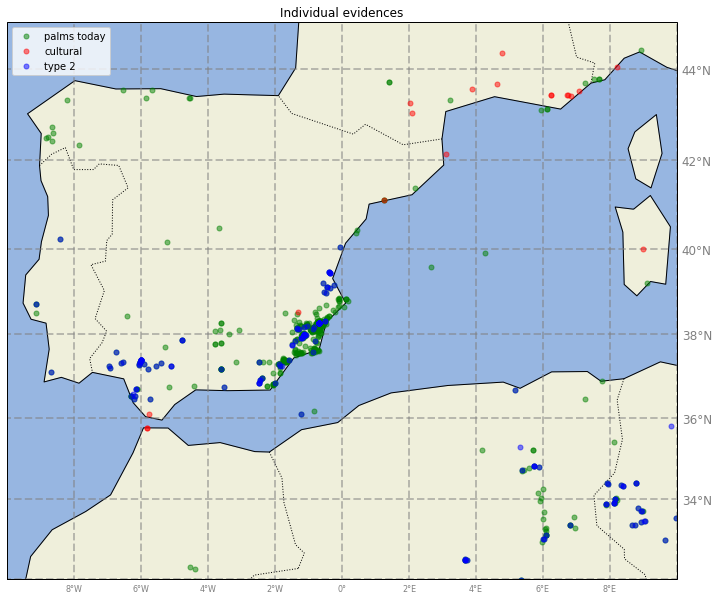

In [19]:
region = [-10, 10, 32, 45]

genmap(figsize=(12,12), extent=region)
#genmap(figsize=(18,18), extent=[-20,70,4,54], grid=None);

for sel,col, name in zip(classes, colors, setnames):
     plt.plot(*np.array(location[sel]).T, '.', color=col, markerSize=10, alpha=0.5, transform=lat_lon,label=name)    

plt.legend();
plt.title('Individual evidences');

Show complete region of study.

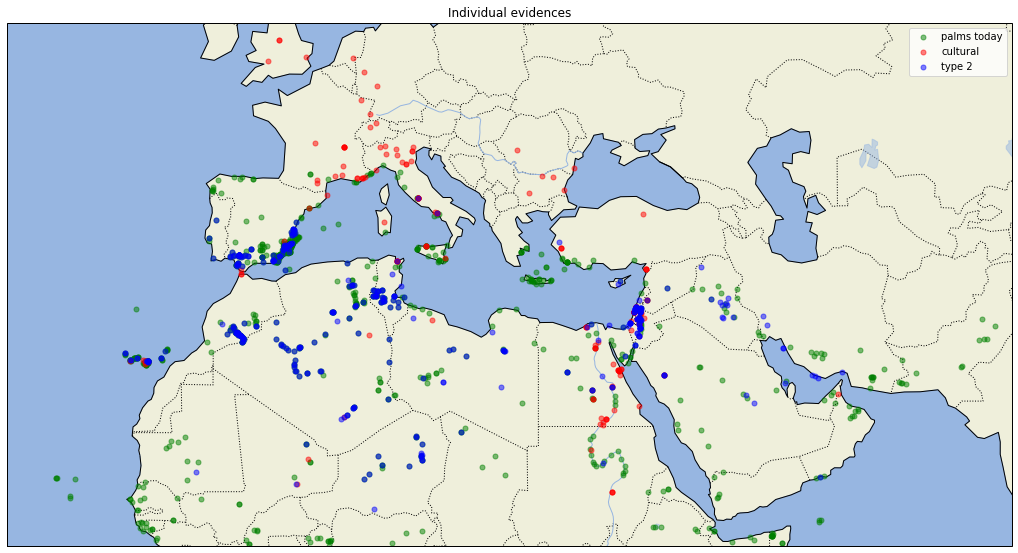

In [20]:
region = [-30,74,10,54]

genmap(figsize=(18,18), extent=region, grid=None);

for sel,col, name in zip(classes, colors, setnames):
     plt.plot(*np.array(location[sel]).T, '.', color=col, markerSize=10, alpha=0.5, transform=lat_lon,label=name)    

plt.legend();
plt.title('Individual evidences');

Show the number of evidences of the differente types.

In [21]:
np.sum(bindata,axis=0)

array([1407,   76,  108,  419,    2])

Utility function to create a grid with given size and offset.

In [22]:
def makeGrid(size=2, offset=0):
    fun = lambda x: np.floor_divide(x-offset,size).astype(int)
    x1,x2,y1,y2 = fun(np.array(region))-[0,1,0,1]
    #print(x1,x2,y1,y2)
    celllocs = np.array( location.apply(fun ))
    cells = {tuple(x) for x in celllocs}
    allcells = {(x,y) for x in range(x1,x2+1) for y in range(y1,y2+1)}
    #emptycells = allcells.difference(cells)
    #print(len(emptycells))
    celldic = { x : np.where( np.all(celllocs == x,axis=1) )[0] for x in allcells }
    data  = { x: bindata[v] for x,v in celldic.items() }
    dataN = { x: d.sum(axis=0) for x,d in data.items() }
    dataB = { x: (v>0).astype(int) for x,v in dataN.items() }
    dataP = { x: v[1:] for x,v in dataB.items() if v[0] == 1 }
    dataN = { x: v[1:] for x,v in dataB.items() if v[0] == 0 }
    S = np.array([v for _,v in dataP.items()]).mean(axis=0)
    E = np.array([1-v for _,v in dataN.items()]).mean(axis=0)
    loc = lambda x: size/2 + x*size + offset
    dataL = { x: loc(np.array(x)) for x in allcells }
    return data, dataB, dataP, dataN, dataL, S,E

Show cells with positive ground truth in the standard grid.

202 942


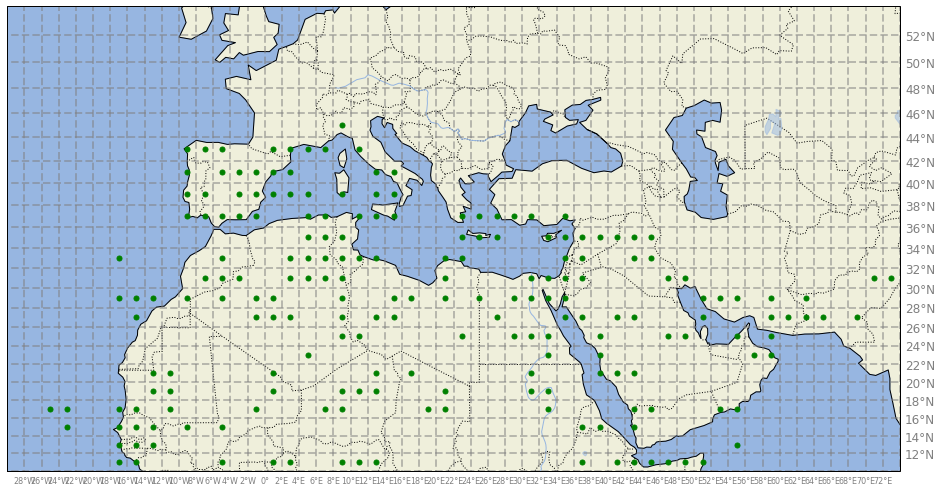

In [23]:
_, dataB, dataP, dataN, dataL, S, E = makeGrid()

print(len(dataP), len(dataN))

genmap(figsize=(16,16), extent=region)

PCells = np.array([dataL[x] for x,_ in dataP.items()])
NCells = np.array([dataL[x] for x,_ in dataN.items()])

plt.plot(*PCells.T, '.',color='green', markerSize=10, transform=lat_lon);
#plt.plot(*NCells.T, '.',color='red',   markerSize=10, transform=lat_lon);

We can compute the sensitivity ($s$) and specificity ($e$) of the features in the above grid:

In [24]:
S

array([0.04950495, 0.10891089, 0.36138614, 0.00990099])

In [25]:
E

array([0.99044586, 0.97770701, 0.98832272, 1.        ])

Tools for creation and application of the tests.

In [26]:
def sig(z):
    return 1/(1+10**(-z/10))

def lb(p):
    return 10*np.log10(max(p,1e-20))

def llr(p):
    return lb(p) - lb(1-p)

def mkTest(s,e):
    p = lb(s)   - lb(1-e)
    n = lb(1-s) - lb(e) 
    return lambda x: p if x else n

#tests = [ mkTest(s,e) for s,e in zip(S,E) ]

Instead of a single grid, we compute the distribution of $s$ and $e$ in a set of grids with different sizes and offsets.

In [27]:
Ss,Es  = zip(* [ makeGrid( s,o)[-2:] for s in [1.5, 1.75, 2, 2.25, 2.5, 3] for o in [s*v for v in [0,0.1,0.2,0.3,0.4,0.5]]])
Ss = np.array(Ss)
Es = np.array(Es)

tests = [ mkTest(s,e) for s,e in zip(np.mean(Ss,axis=0),np.mean(Es,axis=0)) ]

Show the discrimination ability of each feature:

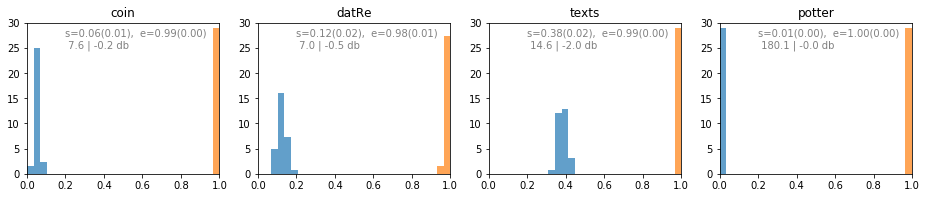

In [28]:
def showTest(test):
    bins = np.linspace(0,1,30)
    plt.hist(Ss[:,test], density=True,alpha=0.7, bins=bins);
    plt.hist(Es[:,test], density=True,alpha=0.7, bins=bins);
    testname = features[test+1]
    #plt.title('{}\n s={:.2f}({:.2f}),  e={:.2f}({:.2f})\n {:.1f} | {:.1f} db'.format(testname,Ss[:,test].mean(),Ss[:,test].std() , Es[:,test].mean(), Es[:,test].std(),
     #         tests[test](True),tests[test](False)))
    plt.text(0.2,25,'s={:.2f}({:.2f}),  e={:.2f}({:.2f})\n {:.1f} | {:.1f} db'.format(Ss[:,test].mean(),Ss[:,test].std() , Es[:,test].mean(), Es[:,test].std(),
              tests[test](True),tests[test](False)),color='gray')
    plt.title(testname)
    plt.xlim(0,1); plt.ylim(0,30);

plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3)
for k in range(len(tests)):
    plt.subplot(3,5,k+1)
    showTest(k)

And finally we apply the tests on a new grid.

[Jeffreys scale of evidence](https://en.wikipedia.org/wiki/Bayes_factor#Interpretation)

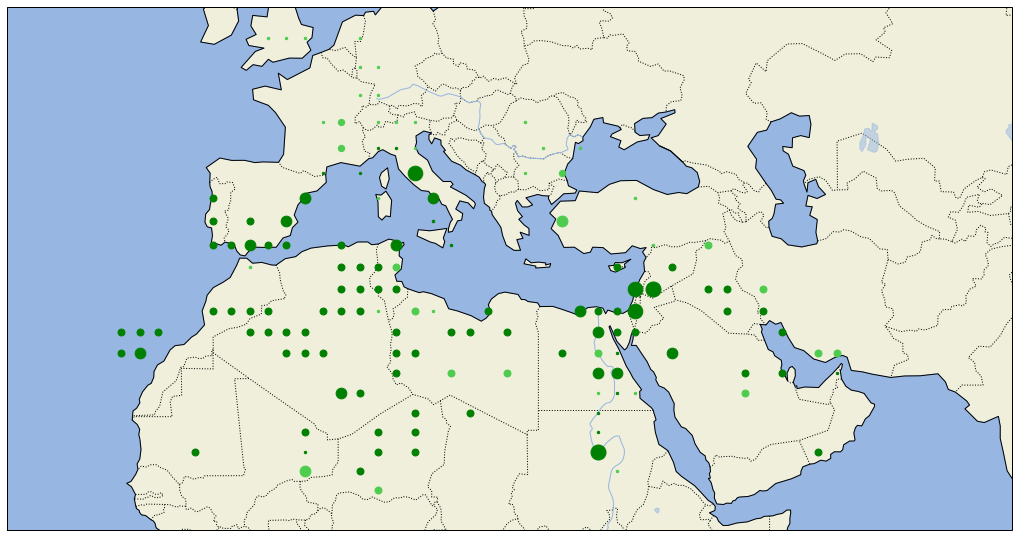

In [29]:
def colorpred(t,p):
    if t==1 and p>0.5: return 'green'
    if t==0 and p<0.5: return 'black'
    if t==0 and p>0.5: return (0.3,0.8,0.3)
    if t==1 and p<0.5: return 'gray'

def colorevidence(t,e):
    if e<5: return 'green'
    if t==0 and p<0.5: return 'black'
    if t==0 and p>0.5: return (0.3,0.8,0.3)
    if t==1 and p<0.5: return 'gray'
    
    
#dataB, _, _, dataL, _, _ = makeGrid()
_, dataB, _, _, dataL, _, _ = makeGrid(size=1.9,offset=-0.15)
    
genmap(figsize=(18,18), extent=region, grid=None)
for c,v in (dataB).items():
    e = sum([t(x) for t,x in zip(tests,v[1:])])
    p = sig(e)
    col = colorpred(v[0],p)
    if e>0:
        #print(e, p)
        plt.plot(*dataL[c],'.',color=col, markerSize=min(e,30), transform=lat_lon)